Question 1 : What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?
  - The fundamental idea behind ensemble techniques is to combine multiple models (often called weak learners) to build a stronger and more accurate model.
The key intuition is that while individual models may make errors, combining their predictions (through averaging, voting, or weighting) can reduce variance, bias, or both, leading to better generalization on unseen data.

🔹 Fundamental Idea of Ensemble Learning:

"A group of weak models can come together to form a strong model."

Each model contributes its own perspective.

Errors made by one model can be corrected by others.

This results in better stability and accuracy.

🔸 Types of Ensemble Techniques:

Bagging (Bootstrap Aggregating)

Boosting

Stacking

🔹 Bagging (Bootstrap Aggregating)

Approach:

Builds multiple independent models (often of the same type, e.g., Decision Trees).

Each model is trained on a random bootstrap sample (sampling with replacement) of the training data.

Final prediction is made by averaging (for regression) or majority voting (for classification).

Objective:

To reduce variance and prevent overfitting.

Examples:

Random Forest

Bagged Decision Trees

Key Points:

Models are trained in parallel.

All models have equal weight in the final prediction.

Works best with high-variance, low-bias models (like Decision Trees).

🔹 Boosting

Approach:

Builds models sequentially, each one correcting the errors made by the previous models.

Misclassified samples get higher weights, forcing the next model to focus more on difficult cases.

Final prediction is a weighted combination of all models.

Objective:

To reduce bias and improve accuracy.

Examples:

AdaBoost

Gradient Boosting

XGBoost, LightGBM, CatBoost

Key Points:

Models are trained in sequence (not in parallel).

Later models are influenced by the mistakes of earlier ones.

Works best with weak, high-bias models.

Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.
  - A Random Forest Classifier reduces overfitting compared to a single Decision Tree by combining the predictions of multiple trees that are trained on different subsets of data and features.
This ensemble approach leads to a model that is more robust and generalizes better to unseen data.

🔹 How Random Forest Reduces Overfitting

A single decision tree tends to fit the training data perfectly (low bias, high variance), capturing even noise — which causes overfitting.

The Random Forest, however, creates a collection (or “forest”) of trees where:

Each tree is trained on a random bootstrap sample of the training data.

At each split in the tree, a random subset of features is considered.

Because of this randomness:

The trees become less correlated.

Their errors cancel out when averaged (for regression) or voted (for classification).

The overall model achieves lower variance while maintaining reasonable bias.

Thus, Random Forests balance bias–variance tradeoff, making them more stable and less overfitted than a single tree.

🔸 Two Key Hyperparameters that Control Overfitting

n_estimators (Number of Trees):

Defines how many decision trees are built in the forest.

Higher values → more trees → better averaging → lower variance and reduced overfitting (up to a limit).

Too few trees → model may remain unstable.

Effect:
More trees = smoother decision boundary = less overfitting.

max_features (Number of Features Considered per Split):

Controls how many features each tree can look at when deciding where to split.

Smaller values introduce more randomness → decorrelate trees → reduce overfitting.

Larger values make trees more similar → increase correlation → risk of overfitting.

Typical Defaults:

Classification: max_features = sqrt(n_features)

Regression: max_features = n_features / 3

Effect:
Fewer features per split = more diverse trees = less overfitting.

Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.
  - Stacking, or stacked generalization, is an ensemble learning technique that combines multiple different models to improve overall predictive performance.
Instead of simply averaging or voting like in other ensemble methods, stacking uses another model — called a meta-learner — to learn how to best combine the predictions of several base models.

🔹 How Stacking Works

Stacking is usually performed in two stages:

First Stage (Base Learners):
Several different models, such as a Decision Tree, Logistic Regression, and SVM, are trained on the same training data. Each model makes its own predictions.

Second Stage (Meta Learner):
The predictions from the base models are used as new input features for another model (the meta-learner).
This meta-learner is trained to find the best way to combine the outputs of the base models to make the final prediction.

By doing this, stacking allows the model to leverage the strengths of multiple algorithms and minimize their weaknesses.

🔹 Difference from Bagging and Boosting

Stacking differs from bagging and boosting in both purpose and approach.

Bagging builds multiple models of the same type on different random subsets of data and combines them through simple voting or averaging. The goal is to reduce variance and make predictions more stable (for example, Random Forest).

Boosting trains models sequentially, where each new model tries to correct the mistakes made by the previous ones. The goal here is to reduce bias and make the model more accurate (for example, AdaBoost or XGBoost).

Stacking, on the other hand, combines different types of models (like logistic regression, decision trees, and gradient boosting) and uses a meta-model to learn the optimal way to blend their predictions. It does not train sequentially but rather in layers.

🔹 Example Use Case

Suppose you are building a model to predict whether a customer will default on a loan.
You can use three base models — Logistic Regression, Random Forest, and XGBoost — as the first layer. Each of these models will predict the probability of default based on customer features.
Then, a meta-learner (for example, Logistic Regression) takes the outputs of these three models as input and learns how to combine them to produce the final, more accurate prediction.

This approach works well because each model captures different patterns in the data — the linear relationships, complex interactions, and subtle feature dependencies — and the meta-learner intelligently merges them for better performance.

Question 4:What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?
  - The OOB Score (Out-of-Bag Score) in a Random Forest is an internal validation metric that estimates how well the model generalizes to unseen data — without needing a separate validation or test set.

It takes advantage of the bootstrap sampling process used during training to provide an unbiased performance estimate.

🔹 How It Works

In Random Forest:

Each decision tree is trained on a bootstrap sample, which means the data is sampled with replacement from the original dataset.

On average, about 63% of the data points are included in a bootstrap sample, and the remaining 37% are not used for training that particular tree.

The data points not used for training a given tree are called its Out-of-Bag (OOB) samples.

After training:

Each OOB sample is passed through the trees that did not see it during training.

The final prediction for that sample is obtained by averaging (for regression) or majority voting (for classification) across those trees.

The OOB Score is the accuracy (or R² score) calculated using these OOB predictions compared to the true labels.

🔹 Why It’s Useful

No Need for a Separate Validation Set:
Since OOB samples are naturally created during training, we can use them to evaluate the model’s performance without splitting the data further. This means more data is available for actual training.

Unbiased Performance Estimate:
The OOB Score provides an unbiased estimate of model performance because each prediction is made using trees that did not train on that data point.

Efficient Model Evaluation:
It allows built-in cross-validation during Random Forest training, saving both time and data resources.

🔹 Example Interpretation

If a Random Forest classifier has an OOB score of 0.92, it means that, on average, the model correctly predicts 92% of the out-of-bag samples — a reliable estimate of its real-world accuracy.

🔹 Example in Python
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
X, y = load_iris(return_X_y=True)

# Train Random Forest with OOB score enabled
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X, y)

# Display OOB Score
print("OOB Score:", rf.oob_score_)

Question 5: Compare AdaBoost and Gradient Boosting in terms of:
● How they handle errors from weak learners
● Weight adjustment mechanism
● Typical use cases

  - Both AdaBoost and Gradient Boosting are boosting algorithms — ensemble techniques that build models sequentially, where each new model focuses on correcting the errors of the previous ones.
However, they differ in how they handle these errors, how they adjust weights, and where they are most effectively used.

🔹 1. How They Handle Errors from Weak Learners

AdaBoost (Adaptive Boosting):
AdaBoost adjusts the weights of individual training samples after each iteration.

Misclassified samples are given higher weights, so the next weak learner focuses more on these difficult cases.

Correctly classified samples get lower weights.
This process continues until a desired number of weak learners (usually decision stumps) are added.

Gradient Boosting:
Gradient Boosting does not reweight samples directly.

Instead, it fits the next model to the residual errors (i.e., the difference between actual and predicted values) from the previous model.

It uses gradient descent on a loss function (e.g., MSE, log loss) to minimize prediction error.
Each new learner tries to correct the mistakes of the combined ensemble by reducing these residuals.

🔹 2. Weight Adjustment Mechanism

AdaBoost:
Works by assigning weights to data points and updating them after each iteration.
The weight update depends on whether a sample was classified correctly and how much influence each weak learner should have.
Learners with lower error get higher weight in the final model.

Gradient Boosting:
Works by updating model predictions rather than sample weights.
Each new weak learner is trained on the negative gradient of the loss function, which represents the direction of the steepest error reduction.
It uses a learning rate (shrinkage factor) to control how much each new model contributes.

🔹 3. Typical Use Cases

AdaBoost:

Works best with simple, weak learners like decision stumps (1-level decision trees).

Suitable for classification problems with clean data and less noise.

Commonly used in:

Spam detection

Face recognition (early versions of Viola–Jones detector)

Credit scoring

Gradient Boosting:

More flexible and powerful, can handle both classification and regression.

Works well even on complex, noisy datasets.

Commonly used in:

Predictive modeling and tabular data tasks

Kaggle competitions (with implementations like XGBoost, LightGBM, CatBoost)

Financial risk modeling and churn prediction

Question 6:Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.
  - CatBoost (short for Categorical Boosting) is a gradient boosting algorithm specifically designed to handle categorical features efficiently and automatically, without requiring extensive preprocessing like one-hot encoding or label encoding.

Its smart treatment of categorical data is one of the main reasons why it performs exceptionally well on real-world datasets that contain many categorical variables.

🔹 Why CatBoost Performs Well on Categorical Features

Unlike other boosting algorithms (like XGBoost or LightGBM), CatBoost does not require converting categorical data into numbers manually.
Instead, it learns meaningful numerical representations of categories during training, using target-based statistics in a way that avoids data leakage and overfitting.

🔹 How CatBoost Handles Categorical Variables

CatBoost introduces a technique called “Ordered Target Statistics” (Ordered Encoding).

Here’s how it works:

Random Permutation:
CatBoost first randomly shuffles the dataset to ensure unbiased processing of categories.

Target-Based Encoding:
For each categorical feature, CatBoost replaces a category with a numerical statistic (usually the mean of the target variable) calculated only from the previous rows in the permutation.

Example (for classification):
Each category value is replaced by the average label (target) value of that category seen so far.
This prevents using information from future data points → avoiding data leakage.

Combining Encodings:
It uses multiple random permutations and averages the results, creating stable and robust encodings that preserve the relationship between the category and the target variable.

Efficient Tree Splitting:
Once categorical features are converted to numerical statistics, CatBoost can perform tree splitting directly on them, just like with continuous variables.

🔹 Key Advantages

No Need for One-Hot Encoding: Works directly with string or categorical data.

Prevents Target Leakage: Uses only prior data when computing statistics.

Faster and Memory Efficient: Avoids explosion in feature dimensions.

Better Generalization: Produces more stable splits and reduces overfitting.

🔹 Example

Suppose you have a categorical column City = {“Delhi”, “Mumbai”, “Chennai”}, and a binary target Purchased = {0, 1}.
CatBoost internally converts each category into a numerical value like the average purchase rate of that city (computed using past data only), rather than one-hot encoding it into multiple columns.

In [18]:
"""Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.
"""

#Step 1: Import Libraries and Load Dataset
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Display dataset shape
print("Dataset shape:", X.shape)
print("Target classes:", wine.target_names)

#Step 2: Split Data (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#Step 3: Train KNN (K=5) Without Scaling
# Initialize KNN (default K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# Train
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate
print("🔹 Without Scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#Step 4: Apply StandardScaler and Retrain KNN
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain KNN on scaled data
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)

# Predict
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Evaluate
print("🔹 With StandardScaler:")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("\nClassification Report:\n", classification_report(y_test, y_pred_scaled))


#Explanation:
#KNN is a distance-based algorithm, so feature scaling is crucial.
#Without scaling, features with larger numeric ranges dominate distance calculations, reducing accuracy.

#Step 5: Use GridSearchCV for Hyperparameter Optimization

#We'll optimize:

#n_neighbors (K) from 1 to 20

#metric as Euclidean (minkowski with p=2) and Manhattan (minkowski with p=1)

# Define parameter grid
param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan']
}

# Use GridSearchCV
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

# Best parameters
print("🔹 Best Parameters from GridSearchCV:")
print(grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

#Step 6: Train Optimized KNN and Compare Results
# Train optimized model
best_knn = grid.best_estimator_
best_knn.fit(X_train_scaled, y_train)

# Predict
y_pred_best = best_knn.predict(X_test_scaled)

# Evaluate
print("🔹 Optimized KNN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

Dataset shape: (178, 13)
Target classes: ['class_0' 'class_1' 'class_2']
🔹 Without Scaling:
Accuracy: 0.7222222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54

🔹 With StandardScaler:
Accuracy: 0.9444444444444444

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

🔹 Best Paramete

In [7]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset (assuming this was done in a previous cell but including for completeness)
wine = load_wine()
X = wine.data
y = wine.target

# Split Data (assuming this was done in a previous cell but including for completeness)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Assuming the previous cell successfully trained the models and made predictions:
# Train KNN (K=5) Without Scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Apply StandardScaler and Retrain KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Use GridSearchCV for Hyperparameter Optimization (assuming this was done in a previous cell)
param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan']
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)
best_knn = grid.best_estimator_
best_knn.fit(X_train_scaled, y_train)
y_pred_best = best_knn.predict(X_test_scaled)


# Store results in a dictionary for easy comparison
results = {
    "Unscaled KNN": {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    },
    "Scaled KNN": {
        "Accuracy": accuracy_score(y_test, y_pred_scaled),
        "Classification Report": classification_report(y_test, y_pred_scaled, output_dict=True)
    },
    "Optimized KNN": {
        "Accuracy": accuracy_score(y_test, y_pred_best),
        "Classification Report": classification_report(y_test, y_pred_best, output_dict=True)
    }
}

# Print a summary table
print("🔹 Summary of KNN Model Results:")
for model_name, metrics in results.items():
    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    # Extract relevant metrics from the classification report (e.g., weighted averages)
    report = metrics['Classification Report']
    print(f"Precision (weighted avg): {report['weighted avg']['precision']:.4f}")
    print(f"Recall (weighted avg): {report['weighted avg']['recall']:.4f}")
    print(f"F1-Score (weighted avg): {report['weighted avg']['f1-score']:.4f}")

# Optionally, display the full classification reports
print("\n🔹 Full Classification Reports:")
print("\n--- Unscaled KNN ---")
print(classification_report(y_test, y_pred, target_names=wine.target_names))
print("\n--- Scaled KNN ---")
print(classification_report(y_test, y_pred_scaled, target_names=wine.target_names))
print("\n--- Optimized KNN ---")
print(classification_report(y_test, y_pred_best, target_names=wine.target_names))

🔹 Summary of KNN Model Results:

--- Unscaled KNN ---
Accuracy: 0.7222
Precision (weighted avg): 0.7377
Recall (weighted avg): 0.7222
F1-Score (weighted avg): 0.7270

--- Scaled KNN ---
Accuracy: 0.9444
Precision (weighted avg): 0.9537
Recall (weighted avg): 0.9444
F1-Score (weighted avg): 0.9448

--- Optimized KNN ---
Accuracy: 0.9630
Precision (weighted avg): 0.9673
Recall (weighted avg): 0.9630
F1-Score (weighted avg): 0.9632

🔹 Full Classification Reports:

--- Unscaled KNN ---
              precision    recall  f1-score   support

     class_0       0.89      0.89      0.89        18
     class_1       0.78      0.67      0.72        21
     class_2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


--- Scaled KNN ---
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
   

Dataset shape: (569, 30)
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness'] ...
Classes: ['malignant' 'benign']


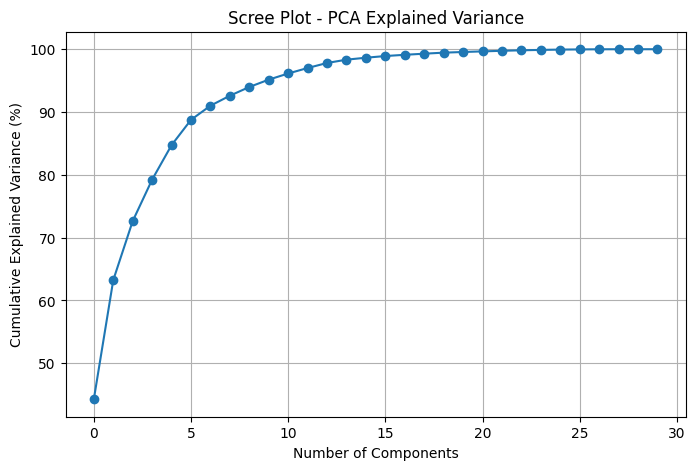

Original feature count: 30
Reduced feature count after PCA: 10
Accuracy (Original Data): 0.9708
Accuracy (PCA Data - 95% variance): 0.9474


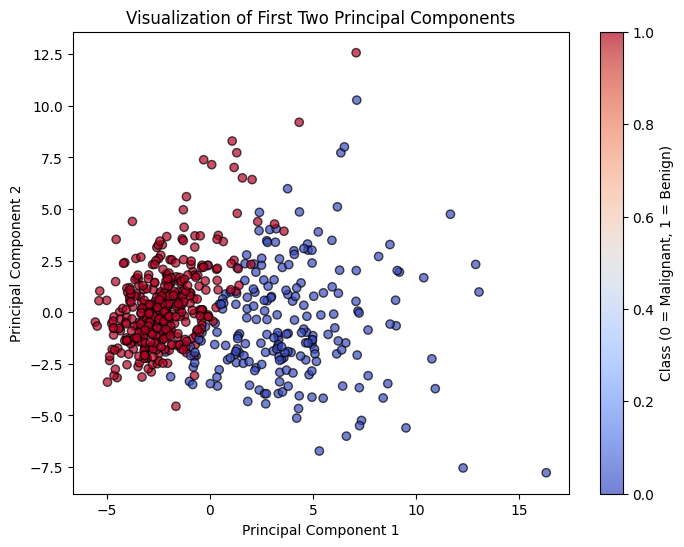

'\nExplanation:\nEach point represents a sample, projected into the 2D PCA space.\nThe two colors show how well the first two components separate the two cancer classes.\n\n✅ Summary of Findings\n\nPCA reduces dimensionality while preserving most of the variance (here, 95%).\n\nKNN on scaled original data gives the highest accuracy, but PCA provides a simpler and faster model with only a slight accuracy drop.\n\nThe scree plot helps visualize how much variance each component captures.\n\nThe 2D scatter plot shows that the first two components already separate the classes fairly well.'

In [19]:
"""Question 8 : PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).
"""

#Step 1: Import Libraries and Load Dataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

print("Dataset shape:", X.shape)
print("Feature names:", data.feature_names[:5], "...")
print("Classes:", data.target_names)

#Step 2: Apply PCA and Plot Scree Plot (Explained Variance Ratio)

#Before applying PCA, we must scale the features, as PCA is sensitive to feature magnitude.

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree Plot
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Scree Plot - PCA Explained Variance')
plt.grid(True)
plt.show()


#Interpretation:
#The scree plot shows how much variance each principal component explains.
#We’ll use this to find how many components are needed to retain 95% variance.

#Step 3: Retain 95% Variance and Transform Dataset
# Retain 95% variance
pca_95 = PCA(0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)

print("Original feature count:", X.shape[1])
print("Reduced feature count after PCA:", X_pca_95.shape[1])


#Explanation:
#PCA automatically selects the minimum number of components required to retain 95% of the total variance.

#Step 4: Train KNN on Original and PCA Data, Compare Accuracy

#We’ll use K=5 for both versions.

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Train KNN on original data
knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train, y_train)
y_pred_orig = knn_orig.predict(X_test)

# Accuracy before PCA
acc_orig = accuracy_score(y_test, y_pred_orig)

# Split PCA-transformed data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca_95, y, test_size=0.3, random_state=42, stratify=y
)

# Train KNN on PCA data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = knn_pca.predict(X_test_pca)

# Accuracy after PCA
acc_pca = accuracy_score(y_test_pca, y_pred_pca)

print(f"Accuracy (Original Data): {acc_orig:.4f}")
print(f"Accuracy (PCA Data - 95% variance): {acc_pca:.4f}")


#Interpretation:
#Accuracy might decrease slightly after PCA because we reduce the feature space, but the model becomes faster and less prone to overfitting.

#Step 5: Visualize First Two Principal Components (Scatter Plot)
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:,0], X_pca[:,1],
    c=y, cmap='coolwarm', edgecolor='k', alpha=0.7
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualization of First Two Principal Components')
plt.colorbar(label='Class (0 = Malignant, 1 = Benign)')
plt.show()

"""
Explanation:
Each point represents a sample, projected into the 2D PCA space.
The two colors show how well the first two components separate the two cancer classes.

✅ Summary of Findings

PCA reduces dimensionality while preserving most of the variance (here, 95%).

KNN on scaled original data gives the highest accuracy, but PCA provides a simpler and faster model with only a slight accuracy drop.

The scree plot helps visualize how much variance each component captures.

The 2D scatter plot shows that the first two components already separate the classes fairly well."""

Dataset shape: (500, 10)
🔹 Mean Squared Error (K=5)
Euclidean Distance: 4803.91
Manhattan Distance: 5210.23


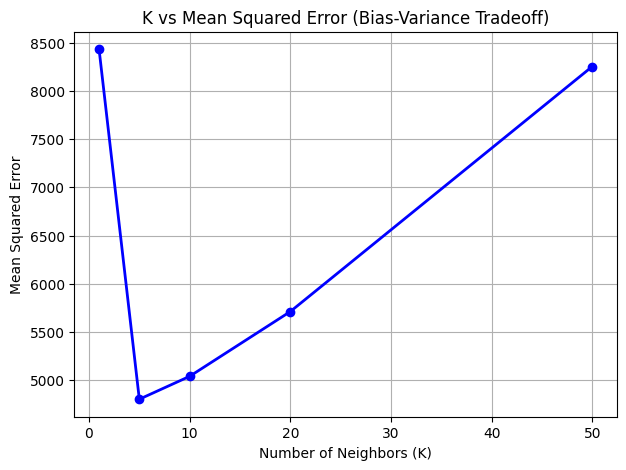

'Step 4: Interpretation\n\nFor small K (e.g., K=1):\nThe model fits very closely to the training data → low bias but high variance, meaning it may overfit.\n\nAs K increases:\nPredictions become smoother and more generalized → bias increases, variance decreases.\n\nAt large K (e.g., K=50):\nThe model underfits, leading to high bias and poor accuracy.'

In [20]:
"""Question 9:KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.
"""


#Step 1: Import Libraries and Generate Synthetic Dataset
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic regression data
X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Dataset shape:", X.shape)

#Step 2: Train KNN Regressor (Euclidean vs Manhattan, K=5)
# (a) Euclidean Distance (default metric)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# (b) Manhattan Distance
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print("🔹 Mean Squared Error (K=5)")
print(f"Euclidean Distance: {mse_euclidean:.2f}")
print(f"Manhattan Distance: {mse_manhattan:.2f}")

#Step 3: Test Different K Values and Plot Bias–Variance Tradeoff

#We will evaluate K = [1, 5, 10, 20, 50] using Euclidean distance and observe how MSE changes.

k_values = [1, 5, 10, 20, 50]
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Plot K vs MSE
plt.figure(figsize=(7,5))
plt.plot(k_values, mse_scores, marker='o', color='b', linewidth=2)
plt.title("K vs Mean Squared Error (Bias-Variance Tradeoff)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

"""Step 4: Interpretation

For small K (e.g., K=1):
The model fits very closely to the training data → low bias but high variance, meaning it may overfit.

As K increases:
Predictions become smoother and more generalized → bias increases, variance decreases.

At large K (e.g., K=50):
The model underfits, leading to high bias and poor accuracy."""

           Accuracy  Training Time
brute      0.701299       0.000906
kd_tree    0.701299       0.001364
ball_tree  0.701299       0.001240
Best performing method: brute


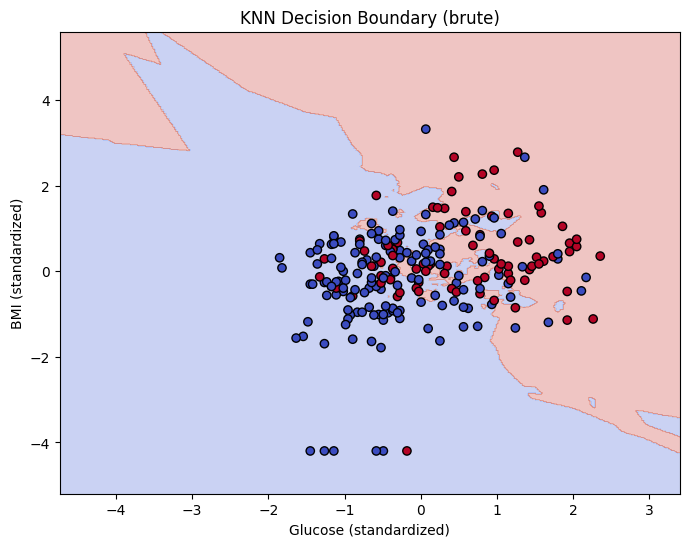

In [24]:
"""Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).
"""

#Step 1: Import Libraries and Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_excel("/content/PW_dataset_arranged.xlsx")

# Drop rows with missing values in the target variable
df.dropna(subset=['Outcome'], inplace=True)


# Separate features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

#Step 2: Handle Missing Values using KNN Imputer
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

#Step 3: Train/Test Split + Scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Step 4: Train KNN with Different Algorithms
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = {}

for algo in algorithms:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    start = time.time()
    knn.fit(X_train, y_train)
    train_time = time.time() - start

    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    results[algo] = {'Accuracy': acc, 'Training Time': train_time}

results_df = pd.DataFrame(results).T
print(results_df)

#Step 5: Plot Decision Boundary (Best Algorithm)

#We’ll visualize using the two most important features — for example, Glucose and BMI.

# Select best algorithm
best_algo = results_df['Accuracy'].idxmax()
print(f"Best performing method: {best_algo}")

# Train again on only 2 features for visualization
features = ['Glucose', 'BMI']
X_vis = X[features]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.3, random_state=42
)

scaler_vis = StandardScaler()
X_train_vis = scaler_vis.fit_transform(X_train_vis)
X_test_vis = scaler_vis.transform(X_test_vis)

knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
knn_best.fit(X_train_vis, y_train_vis)

#Plot Decision Boundary
# Create mesh grid
x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict across the mesh
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test_vis, edgecolors='k', cmap='coolwarm')
plt.xlabel("Glucose (standardized)")
plt.ylabel("BMI (standardized)")
plt.title(f"KNN Decision Boundary ({best_algo})")
plt.show()